In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cwd = os.getcwd()

In [3]:
df = pd.read_csv(os.path.join(cwd, "customer_booking.csv"), encoding="ISO-8859-1")

In [4]:
# Data Exploration
df_info = df.info()
df_describe = df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
# Sales Channel Analysis
sales_channel_counts = df.sales_channel.value_counts()
total_bookings = sales_channel_counts.sum()
per_internet = sales_channel_counts["Internet"]
per_mobile = sales_channel_counts["Mobile"]
print(f"Number of bookings done through internet: {per_internet} ({per_internet/total_bookings*100:.2f}%)")
print(f"Number of bookings done through phone call: {per_mobile} ({per_mobile/total_bookings*100:.2f}%)")


Number of bookings done through internet: 44382 (88.76%)
Number of bookings done through phone call: 5618 (11.24%)


In [9]:
# Trip Type Analysis
trip_type_counts = df.trip_type.value_counts()
total_trip_types = trip_type_counts.sum()

per_round = trip_type_counts.get("RoundTrip", 0)
per_oneway = trip_type_counts.get("OneWay", 0)
per_circle = trip_type_counts.get("Circle", 0)

print(f"Number of round trips: {per_round} ({per_round/total_trip_types*100:.2f}%)")
print(f"Number of one-way trips: {per_oneway} ({per_oneway/total_trip_types*100:.2f}%)")
print(f"Number of circle trips: {per_circle} ({per_circle/total_trip_types*100:.2f}%)")


Number of round trips: 49497 (98.99%)
Number of one-way trips: 387 (0.77%)
Number of circle trips: 0 (0.00%)


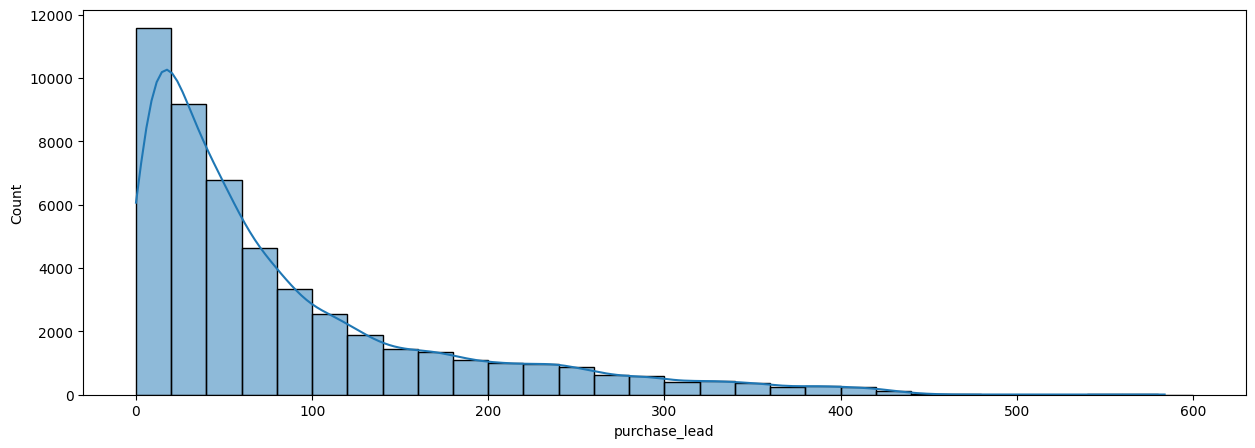

In [10]:
# Histogram Plotting - Purchase Lead
plt.figure(figsize=(15, 5))
sns.histplot(data=df[df.purchase_lead < 600], x="purchase_lead", binwidth=20, kde=True)
plt.show()

In [11]:
# Filtering Data - Length of Stay
df = df[df.length_of_stay < 500]


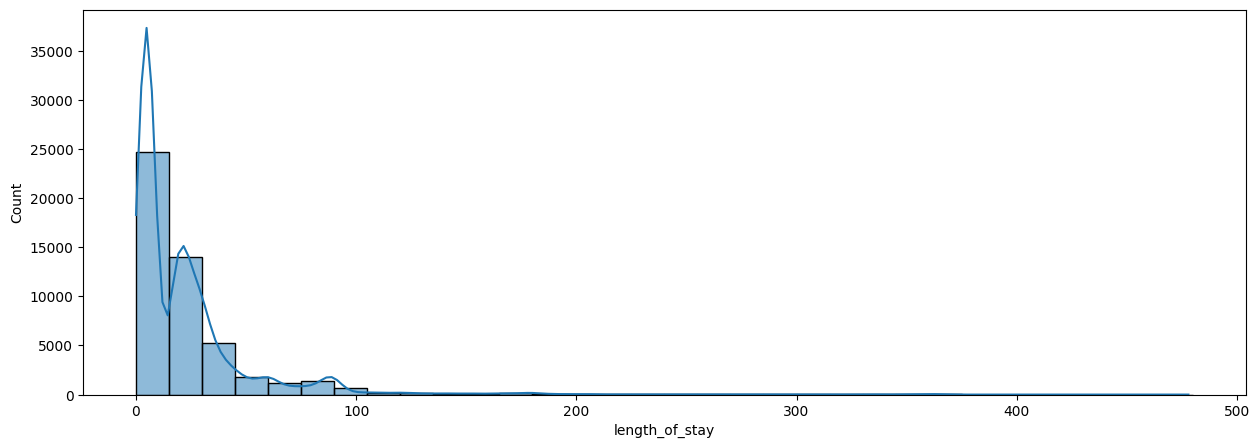

In [12]:
# Histogram Plotting - Length of Stay
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="length_of_stay", binwidth=15, kde=True)
plt.show()

In [14]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7
}

flight_day_mapping = pd.DataFrame(list(mapping.items()), columns=["Day", "Mapped Value"])
print(flight_day_mapping)


   Day  Mapped Value
0  Mon             1
1  Tue             2
2  Wed             3
3  Thu             4
4  Fri             5
5  Sat             6
6  Sun             7


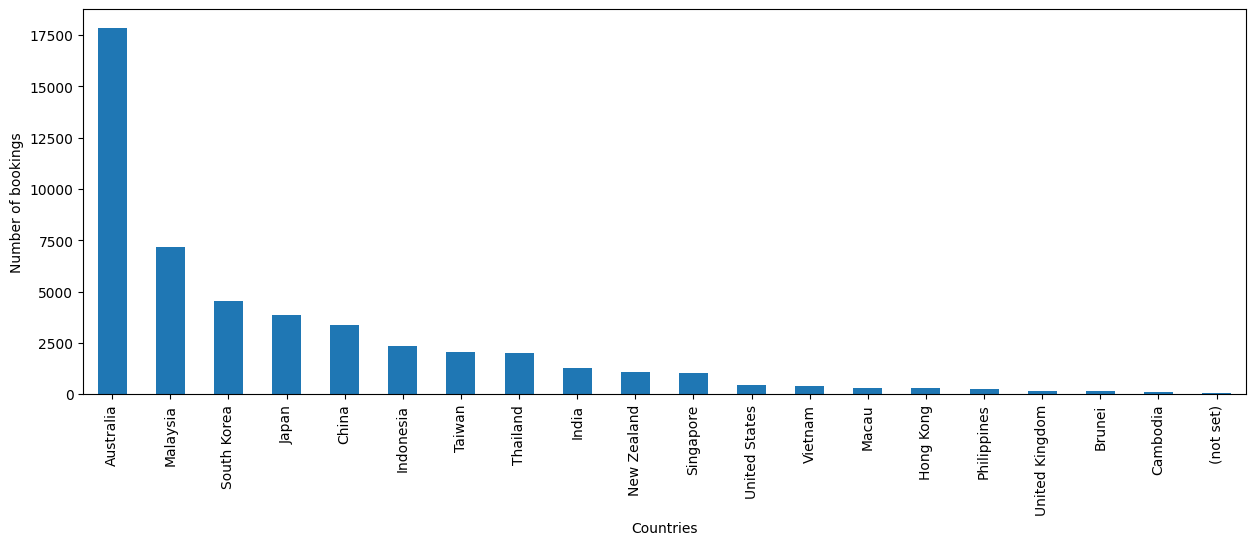

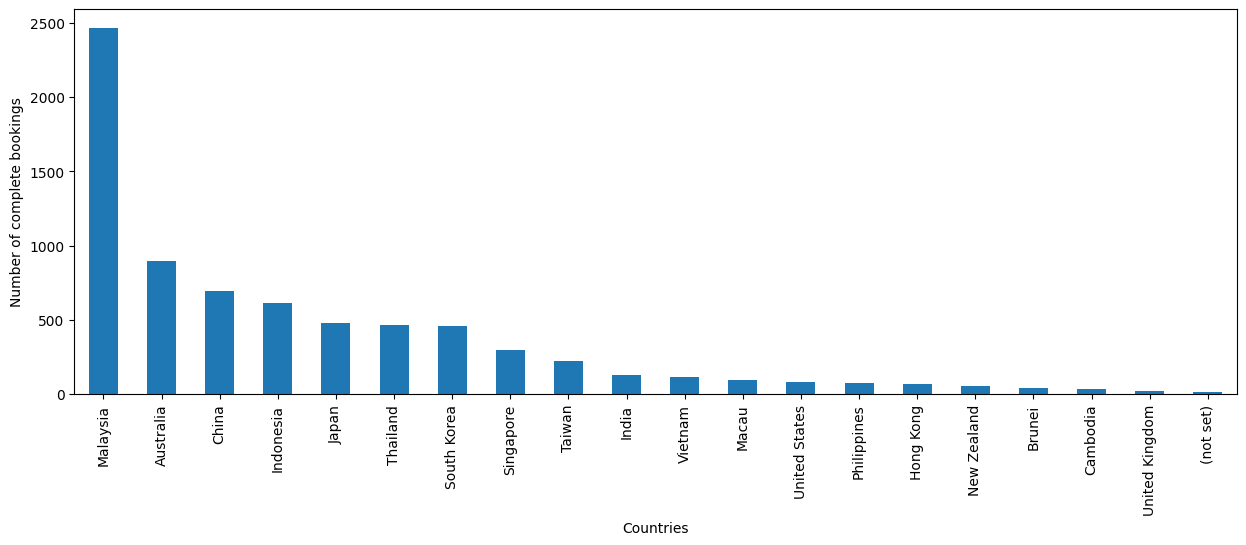

In [16]:
# Booking Origin Analysis
def plot_booking_origin(df, top_n=20):
    plt.figure(figsize=(15, 5))
    ax = df.booking_origin.value_counts().head(top_n).plot(kind="bar")
    ax.set_xlabel("Countries")
    ax.set_ylabel("Number of bookings")
    plt.show()

plot_booking_origin(df)

top_n = 20  # Define the value of top_n
plt.figure(figsize=(15, 5))
ax = df[df.booking_complete == 1].booking_origin.value_counts().head(top_n).plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")
plt.show()


In [22]:
# Booking Origin Analysis
booking_origin_counts = df.booking_origin.value_counts()
complete_booking_origin_counts = df[df.booking_complete == 1].booking_origin.value_counts()

# Ensure same index for both counts
booking_origin_counts = booking_origin_counts.reindex(complete_booking_origin_counts.index, fill_value=0)

# Create DataFrame for Booking Origin Analysis
booking_origin_table = pd.DataFrame({
    'Countries': booking_origin_counts.index,
    'Number of Bookings': booking_origin_counts.values,
    'Number of Complete Bookings': complete_booking_origin_counts.values
})

print(booking_origin_table)


               Countries  Number of Bookings  Number of Complete Bookings
0               Malaysia                7173                         2468
1              Australia               17866                          899
2                  China                3387                          694
3              Indonesia                2369                          615
4                  Japan                3885                          478
5               Thailand                2030                          470
6            South Korea                4559                          462
7              Singapore                1044                          299
8                 Taiwan                2076                          224
9                  India                1268                          131
10               Vietnam                 388                          114
11                 Macau                 304                           95
12         United States              

In [24]:
# Booking Completion Analysis
booking_complete_counts = df.booking_complete.value_counts()
total_bookings = len(df)
successful_bookings = booking_complete_counts[1]
unsuccessful_bookings = booking_complete_counts[0]

successful_booking_per = successful_bookings / total_bookings * 100
unsuccessful_booking_per = unsuccessful_bookings / total_bookings * 100

print(f"Out of {total_bookings} booking entries, {successful_bookings} ({successful_booking_per:.2f}%) bookings were successful or complete.")
print(f"Out of {total_bookings} booking entries, {unsuccessful_bookings} ({unsuccessful_booking_per:.2f}%) bookings were unsuccessful or incomplete.")


Out of 49990 booking entries, 7477 (14.96%) bookings were successful or complete.
Out of 49990 booking entries, 42513 (85.04%) bookings were unsuccessful or incomplete.


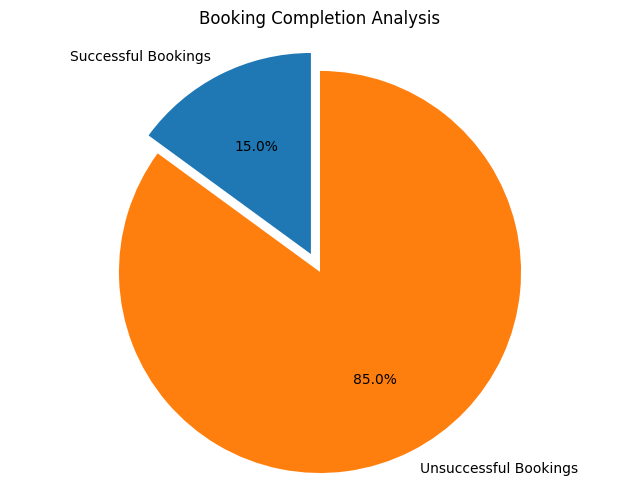

In [25]:
# Booking Completion Analysis
booking_complete_counts = df.booking_complete.value_counts()

successful_bookings = booking_complete_counts[1]
unsuccessful_bookings = booking_complete_counts[0]

# Create a pie chart
labels = ['Successful Bookings', 'Unsuccessful Bookings']
sizes = [successful_bookings, unsuccessful_bookings]
colors = ['#1f77b4', '#ff7f0e']
explode = (0.1, 0)  # Explode the first slice (Successful Bookings)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Booking Completion Analysis')

plt.show()

In [26]:
# Data Export
df.to_csv(os.path.join(cwd, "filtered_customer_booking.csv"), index=False)